# Matplotlib Examples

## 1. Setup

### 1.1 Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Data

In [2]:
x = np.linspace(0,2,51)
y = np.sin(np.pi*x)

## 2. Basic Plots

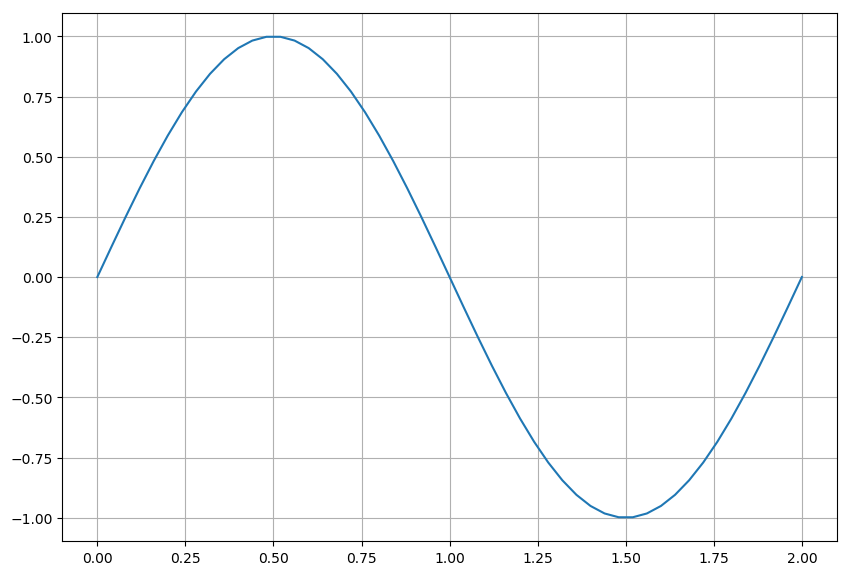

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7),
                       dpi=100, facecolor='w', edgecolor='k')
ax.plot(x, y)
ax.grid(True)